###### Import necessary libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Load the Titanic dataset

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis (EDA)
###### 1. How many rows and columns are there in the dataset?

In [4]:
num_rows, num_cols = data.shape
print('Number of rows:', num_rows)
print('Number of columns:', num_cols)

Number of rows: 891
Number of columns: 12


891 Passengers in the titanic (According to Google the number should be around 2240). This tells us the data quality might not be too good.

###### 2. How many missing values are there in each column?

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### 3. Fill missing values for age, cabin, and embarked using appropriate strategies.

In [27]:
from sklearn.impute import SimpleImputer

#Age is a continuous variable hence we use average imputation.
age_imputer = SimpleImputer(strategy='mean')
data['Age'] = age_imputer.fit_transform(data[['Age']])

#Cabin and Embarked are categorical variables, hence we use mode imputation instead of mean imputation.
cabin_imputer = SimpleImputer(strategy='most_frequent')
data['Cabin'] = cabin_imputer.fit_transform(data[['Cabin']].values.reshape(-1, 1))[:, 0]

embarked_imputer = SimpleImputer(strategy='most_frequent')
data['Embarked'] = embarked_imputer.fit_transform(data[['Embarked']].values.reshape(-1, 1))[:, 0]

missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


###### 4. What is the distribution of passenger classes?

In [17]:
passenger_class = data['Pclass'].value_counts()
print("Passenger class distribution:")
print(passenger_class)

Passenger class distribution:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


###### 5. How many passengers embarked from each port?

In [18]:
embarked_counts = data['Embarked'].value_counts()
print("Passengers embarked from each port:")
print(embarked_counts)

Passengers embarked from each port:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


###### 6. What is the overall survival rate?

In [19]:
survived_count = data['Survived'].sum()

print("Number of passengers who survived:", survived_count)

Number of passengers who survived: 342


In [20]:
survival_rate = data['Survived'].mean() * 100
print("Survival rate: {:.2f}%".format(survival_rate))

Survival rate: 38.38%


### Data Visualization
###### 1. Plotting survival rate by gender

Text(0.5, 1.0, 'Survival Rate by Gender')

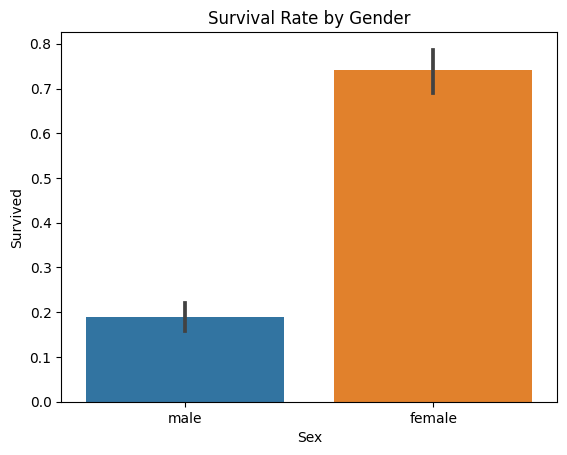

In [22]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title("Survival Rate by Gender")

###### 2. Plotting survival rate by passenger class

Text(0.5, 1.0, 'Survival Rate by Passenger Class')

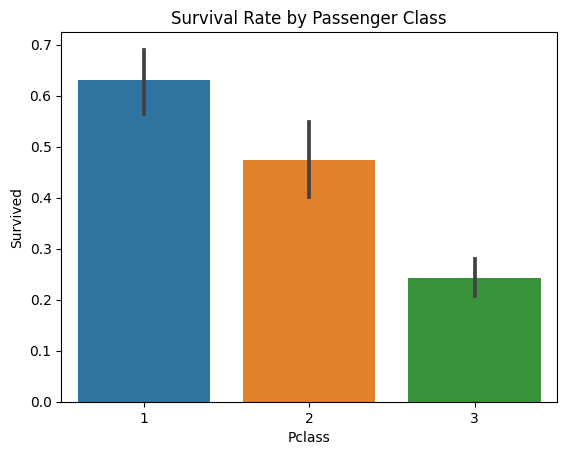

In [23]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title("Survival Rate by Passenger Class")

###### 3. Plotting survival rate by embarked port

Text(0.5, 1.0, 'Survival Rate by Embarked Ports')

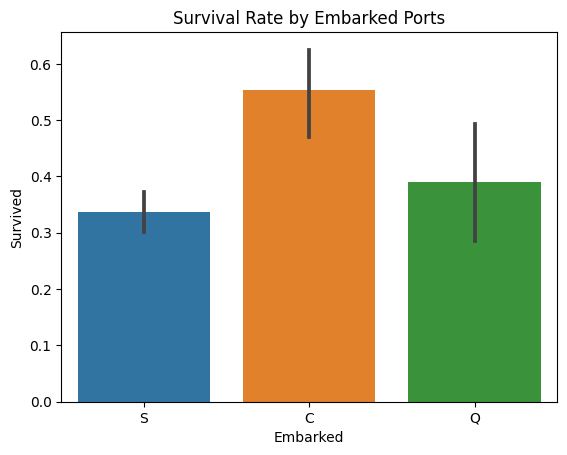

In [24]:
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title("Survival Rate by Embarked Ports")